# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [16]:
#from google.colab import drive
#drive.mount('/content/gdrive/')
#data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv, index_col='PassengerId')

#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [17]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [19]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

In [21]:
print(f'Количество мужчин и женщин:\n{data.Sex.value_counts()}\n')
print(f'Распределение по классам:\n{data.Pclass.value_counts()}')

Количество мужчин и женщин:
male      577
female    314
Name: Sex, dtype: int64

Распределение по классам:
3    491
1    216
2    184
Name: Pclass, dtype: int64


Соотношение выживших мужчин:
0.18890814558058924



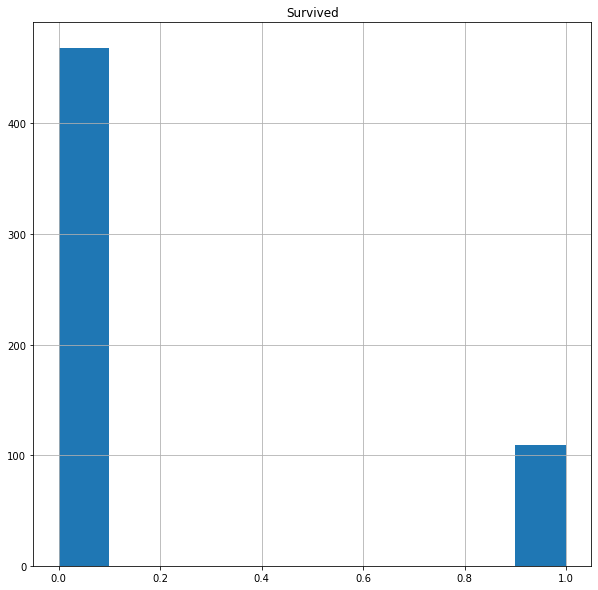

In [59]:
male_surv = data.loc[(data.Sex == 'male') & (data.Survived == True)].Sex.count()
male_died = data.loc[(data.Sex == 'male') & (data.Survived == False)].Sex.count()
male_ratio = male_surv / (male_died + male_surv)
print(f'Соотношение выживших мужчин:\n{male_ratio}\n')

male_data = data.loc[data.Sex == 'male']
male_hist = male_data.hist('Survived', figsize=(10,10))

Соотношение выживших женщин:
0.7420382165605095



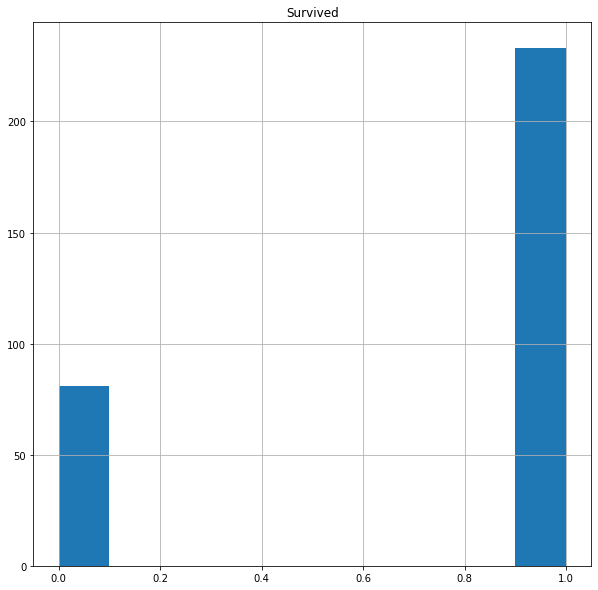

In [61]:
female_surv = data.loc[(data.Sex == 'female') & (data.Survived == True)].Sex.count()
female_died = data.loc[(data.Sex == 'female') & (data.Survived == False)].Sex.count()
female_ratio = female_surv / (female_died + female_surv)
print(f'Соотношение выживших женщин:\n{female_ratio}\n')

female_data = data.loc[data.Sex == 'female']
female_hist = female_data.hist('Survived', figsize=(10,10))

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [62]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [63]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [65]:
from sklearn.model_selection import train_test_split
data_train, y_train, data_test, y_test = train_test_split(data.values, y.values, train_size=0.7)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [66]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0


In [67]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [103]:
# сделаем отдельную таблицу data_full с буквой кабины
data_copy = data.copy()
def get_cabin_letter(row):
    return row['Cabin'][0]

data_copy['cabin_type'] = data_copy.apply(get_cabin_letter, axis=1)
data_copy.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0


### Признак по титулу
Выделим в *Name* титулы пассажиров и вынесем их в отдельную колонку *Title*.\
Непопулярные титулы объединим в *Other*, остальные оставим без изменений.

In [104]:
def group_by_title(dataset):
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

group_by_title(data_copy)
data_copy.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,Title
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,Mr


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [107]:
numeric_indices = np.array([0, 3, 4, 5, 7, 10])
categorical_indices = np.array([2, 9, 11, 12])

numeric_data = data_copy[data_copy.columns[numeric_indices]]
categorial_data = data_copy[data_copy.columns[categorical_indices]]

In [108]:
dummy_features = pd.get_dummies(categorial_data)

In [109]:
data_copy = pd.concat([numeric_data, dummy_features], axis=1)
data_copy.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_0,Embarked_C,...,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,38.0,1,0,71.2833,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,26.0,0,0,7.9250,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,35.0,1,0,53.1000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [142]:
data_first_try = data.copy()
y_first_try = data['Survived']

In [143]:
data_first_try.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0


In [144]:
data_first_try = data_first_try.drop(['Name'], axis=1)
data_first_try = data_first_try.drop(['Ticket'], axis=1)
data_first_try = data_first_try.drop(['Cabin'], axis=1)

In [145]:
data_first_try.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0
2,1,female,38.0,1,0,71.2833,C,1
3,3,female,26.0,0,0,7.9250,S,1
4,1,female,35.0,1,0,53.1000,S,1
5,3,male,35.0,0,0,8.0500,S,0


In [146]:
numeric_indices_try = np.array([0, 2, 3, 4, 5, 7])
categorical_indices_try = np.array([1, 6])

numeric_data_try = data_first_try[data_first_try.columns[numeric_indices_try]]
categorial_data_try = data_first_try[data_first_try.columns[categorical_indices_try]]

In [147]:
dummy_features_try = pd.get_dummies(categorial_data_try)

In [148]:
data_first_try = pd.concat([numeric_data_try, dummy_features_try], axis=1)
data_first_try.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,0,1,0,0,0,1
2,1,38.0,1,0,71.2833,1,1,0,0,1,0,0
3,3,26.0,0,0,7.9250,1,1,0,0,0,0,1
4,1,35.0,1,0,53.1000,1,1,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [149]:
from sklearn.model_selection import train_test_split

data_first_try_train, data_first_try_test, y_first_try_train, y_first_try_test = train_test_split(data_first_try.values, y_first_try.values, train_size=0.7)

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_first_try_train = scaler.fit_transform(data_first_try_train)
data_first_try_test = scaler.transform(data_first_try_test)

In [151]:
from sklearn.linear_model import LinearRegression

model_try = LinearRegression()

model_try.fit(data_first_try_train, y_first_try_train)

y_first_try_train_prediction = model_try.predict(data_first_try_train)
y_first_try_test_prediction = model_try.predict(data_first_try_test)

In [158]:
from sklearn.model_selection import cross_val_score

result_try = cross_val_score(estimator=LinearRegression(), X=data_first_try, y=y_first_try, scoring='neg_mean_absolute_error', cv=5)
result_try

array([-3.78806766e-15, -1.14319784e-15, -5.52637473e-16, -5.26310712e-16,
       -2.68021068e-15])

In [159]:
print(f'Среднее MAE равно {-result_try.mean()}, стандартное отклонение MAE равно {result_try.std()}')

Среднее MAE равно 1.7380848733094367e-15, стандартное отклонение MAE равно 1.2897754213489974e-15


### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [154]:
y_copy = data_copy['Survived']

In [155]:
from sklearn.model_selection import train_test_split

data_copy_train, data_copy_test, y_copy_train, y_copy_test = train_test_split(data_copy.values, y_copy.values, train_size=0.7)

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_copy_train = scaler.fit_transform(data_copy_train)
data_copy_test = scaler.transform(data_copy_test)

In [157]:
from sklearn.linear_model import LinearRegression

model_copy = LinearRegression()

model_copy.fit(data_copy_train, y_copy_train)

y_copy_train_prediction = model_copy.predict(data_copy_train)
y_copy_test_prediction = model_copy.predict(data_copy_test)

In [160]:
from sklearn.model_selection import cross_val_score

result_copy = cross_val_score(estimator=LinearRegression(), X=data_copy, y=y_copy, scoring='neg_mean_absolute_error', cv=5)
result_copy

array([-5.24006729e-15, -2.41785474e-15, -3.57204176e-16, -6.54946097e-16,
       -4.20698128e-15])

In [161]:
print(f'Среднее MAE равно {-result_copy.mean()}, стандартное отклонение MAE равно {result_copy.std()}')

Среднее MAE равно 2.5754107162483716e-15, стандартное отклонение MAE равно 1.9181170797992994e-15


### Итог:
Результаты ухудшились

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [ ]:
<YOUR CODE>

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

In [ ]:
<YOUR CODE>

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?